# Linear Regression

1. https://towardsdatascience.com/linear-regression-in-depth-part-1-485f997fd611
2. https://towardsdatascience.com/linear-regression-in-depth-part-2-5d40fd19efd4
3. https://medium.com/@roiyeho/understanding-polynomial-regression-d963ebb7cc6e
4. https://towardsdatascience.com/predicting-diabetes-with-machine-learning-part-ii-a6f703e8cf04
5. https://github.com/federico-trotta/predicting_diabetes_with_ML/blob/main/diabetes_predictions.ipynb
6. https://medium.com/@roiyeho/regularization-19b1879415a1

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.datasets import load_diabetes

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### 1. Non Vectorized implementation with single variable

$$
\hat{y} = wx + b \\
error^{(i)} = \hat{y}^{(i)} - y^{(i)} \\
\mathcal{J}(w, b) = \frac{1}{n} \sum_{i=1}^n{\hat{y}^{(i)} - y^{(i)})}^2 \\
\mathcal{J}(w, b) = \frac{1}{n} \sum_{i=1}^n{(\hat{y}^{(i)} - y^{(i)})}^2
$$

In [3]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

$$
\frac{\partial{\mathcal{J}}}{\partial{b}} = \frac{\partial{\mathcal{J}}}{\partial{\hat{y}^{(i)}}} \frac{\partial{\hat{y}^{(i)}}}{\partial{b}} \hspace{4 mm} = \frac{1}{m} \sum_{i=1}^m{2(b + w x^{(i)} - y^{(i)})} \\

\frac{\partial{\mathcal{J}}}{\partial{w}} = \frac{\partial{\mathcal{J}}}{\partial{\hat{y}^{(i)}}} \frac{\partial{\hat{y}^{(i)}}}{\partial{w}} = \frac{1}{m} \sum_{i=1}^m{2x^{(i)}(b + w x^{(i)} - y^{(i)})}
$$

In [4]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

$$
b = b - \eta \frac{\partial{\mathcal{J}}}{\partial{b}} \\

w = w - \eta \frac{\partial{\mathcal{J}}}{\partial{w}}
$$

In [5]:
import math, copy
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    w = copy.deepcopy(w_in) # avoid modifying global w_in
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            # print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
            #       f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
            #       f"w: {w: 0.3e}, b:{b: 0.5e}")
            print(f"Iteration {i:4}: Cost {J_history[-1]} ",
                  f"dj_dw: {dj_dw}, dj_db: {dj_db}  ",
                  f"w: {w}, b:{b}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [6]:
true_b = 1
true_w = 2
N = 100

np.random.seed(42)

# Create an array of the given shape and populate it with random samples 
# from a uniform distribution over [0, 1)
X = np.random.rand(N, 1)
epsilon = (.1 * np.random.randn(N, 1))

y = true_b + true_w * X + epsilon

In [7]:
df = pd.DataFrame({ "x": X.tolist(), "y": y.tolist()})
df.head()

,x,y
0,[0.3745401188473625],[1.757784944518542]
1,[0.9507143064099162],[2.8715278777732456]
2,[0.7319939418114051],[2.4731639612763603]
3,[0.5986584841970366],[1.998560076933984]
4,[0.15601864044243652],[1.290070092101122]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(X_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)

#Compare the w and b obtained with gradient descent with actual values
print(f"(w,b) found by gradient descent: ({w_final},{b_final})")

Iteration    0: Cost [1.98439446]  dj_dw: [-1.07045639], dj_db: [-1.93170119]   w: [0.01070456], b:[0.01931701]
Iteration 1000: Cost [0.01880822]  dj_dw: [-0.0399977], dj_db: [0.02009333]   w: [1.37779466], b:[1.30683712]
Iteration 2000: Cost [0.00792692]  dj_dw: [-0.02012293], dj_db: [0.01011397]   w: [1.66699653], b:[1.16148954]
Iteration 3000: Cost [0.00517219]  dj_dw: [-0.0101249], dj_db: [0.00508887]   w: [1.81250747], b:[1.08835443]
Iteration 4000: Cost [0.0044748]  dj_dw: [-0.00509436], dj_db: [0.00256047]   w: [1.88572161], b:[1.05155634]
Iteration 5000: Cost [0.00429824]  dj_dw: [-0.00256324], dj_db: [0.00128831]   w: [1.92255946], b:[1.0330413]
Iteration 6000: Cost [0.00425355]  dj_dw: [-0.0012897], dj_db: [0.00064821]   w: [1.9410945], b:[1.02372542]
Iteration 7000: Cost [0.00424223]  dj_dw: [-0.00064892], dj_db: [0.00032615]   w: [1.95042045], b:[1.01903811]
Iteration 8000: Cost [0.00423937]  dj_dw: [-0.0003265], dj_db: [0.0001641]   w: [1.95511282], b:[1.01667968]
Iteratio

### 2. Load dataset for multiple linear regression

In [10]:
# Load the Diabetes dataset
data = load_diabetes()

In [11]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [12]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [13]:
X = data.data
y = data.target

# Convert the iris dataset to a pandas dataframe
df = pd.DataFrame(data.data, columns=["age","sex","bmi","bp", "tc", "ldl", "hdl","tch", "ltg", "glu"])

# Add the target variable to the dataframe
df['target'] = data.target

# Print the first 5 rows of the dataframe
df.head()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [14]:
df.shape

(442, 11)

##### 2.1 EDA

In [15]:
df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
tc        0
ldl       0
hdl       0
tch       0
ltg       0
glu       0
target    0
dtype: int64

In [16]:
#describing dataframe
df.describe()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


**Observations**:
1. All features except target have the same standard deviation
2. Apart from target column and a couple of exceptions, the rest of the features have the same order of magnitude (mean, min, max and percentiles).

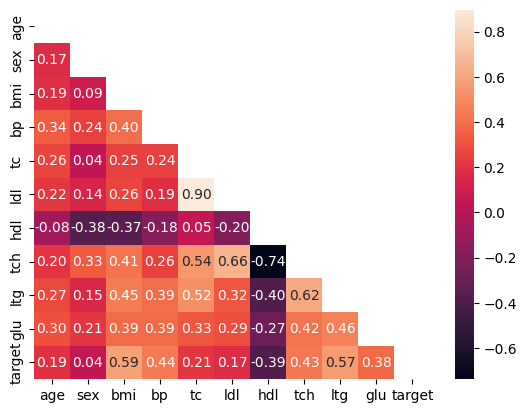

In [17]:
#applying mask
mask = np.triu(np.ones_like(df.corr()))

#correlation matrix
dataplot = sns.heatmap(df.corr(), annot=True, fmt='.2f', mask=mask)

**Observations**:
1. No high correlation between features. i.e. no multicollinearity to worry about

c:\Users\srikanth\anaconda3\envs\quickstart\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


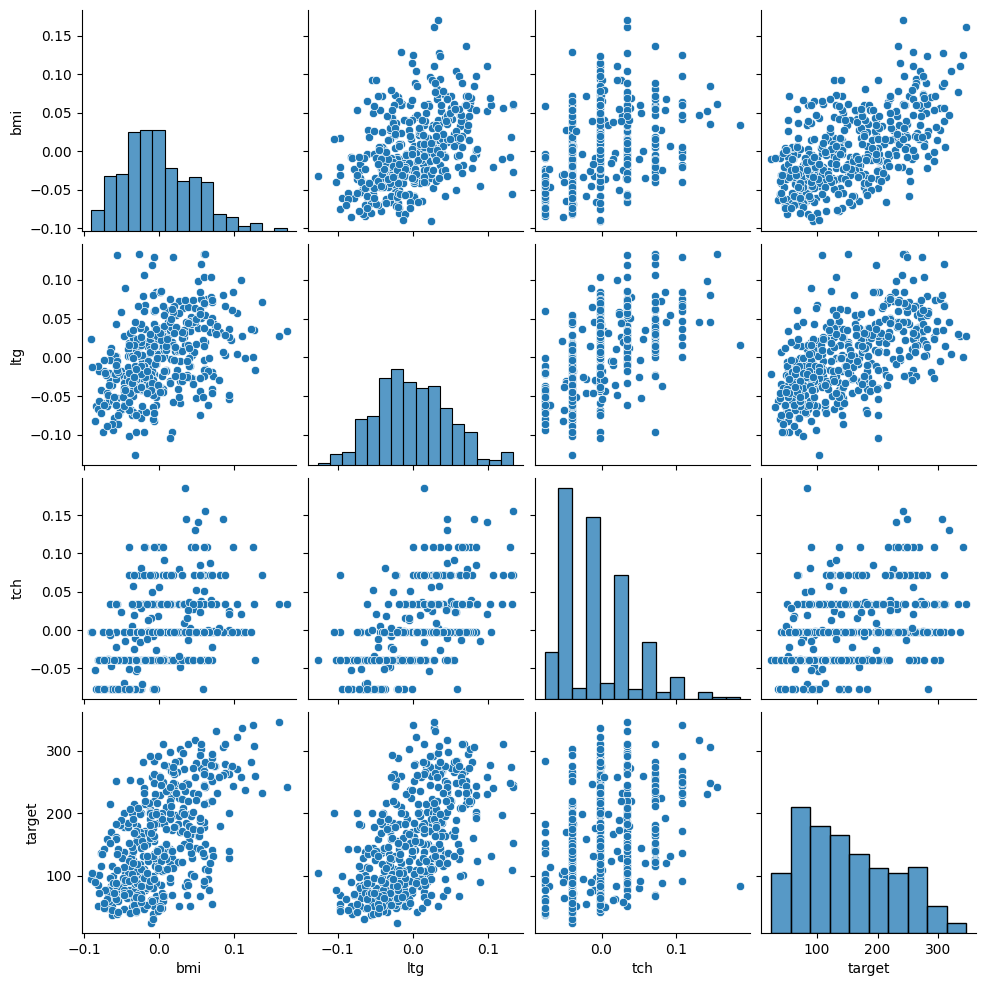

In [18]:
sns.pairplot(df[['bmi', 'ltg', 'tch', 'target']])

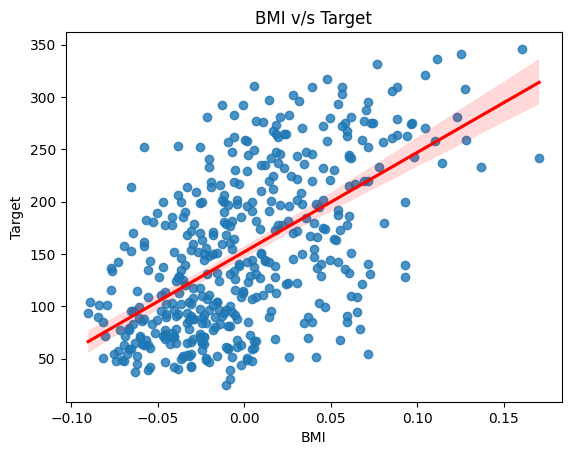

In [19]:
sns.regplot(data=df, x='bmi', y='target',line_kws={"color": "red"})
plt.title("BMI v/s Target")
plt.xlabel("BMI")
plt.ylabel("Target")
plt.show()

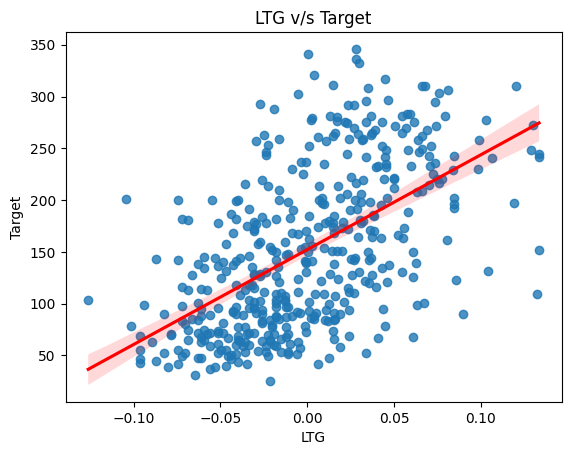

In [20]:
sns.regplot(data=df, x='ltg', y='target',line_kws={"color": "red"})
plt.title("LTG v/s Target")
plt.xlabel("LTG")
plt.ylabel("Target")
plt.show()

**Observation**:

1. Relationship between ltg/bmi with target is mostly linear. There is slight heteroskedasticity

### 3. Multiple Linear Regression with Vectorized implementation

$$
\mathcal{J}(w) = \frac{1}{m} (Xw - y)^T(Xw - y) \\
\nabla_w J = \frac{2}{m} X^T (Xw - y) \\
\textbf{w} = \textbf{w} - \eta \nabla_w J 
$$

In [21]:
def vectorized_compute_cost(X, y, w):
    m = len(y)
    predictions = np.dot(X, w)
    error = predictions - y
    cost = (1 / (2 * m)) * np.sum(error**2)
    return cost

In [22]:
def vectorized_compute_gradient(X, y, w):
    m = len(y)
    predictions = np.dot(X, w)
    error = predictions - y
    gradient = (1 / m) * np.dot(X.T, error)
    return gradient


In [23]:
def gradient_descent(X, y, w, learning_rate, num_epochs):
    m = len(y)
    loss_history = []

    for epoch in range(num_epochs):
        cost = vectorized_compute_cost(X, y, w)

        gradient = vectorized_compute_gradient(X, y, w)
        
        w -= learning_rate * gradient

        loss_history.append(cost)

    return w, loss_history

Data matrix X should be augmented with 1s in the first column that correspond to bias (intercept) weight w_0
$$
X = \begin{bmatrix}
1 & x^{(1)}_1 & .. & x^{(1)}_n \\
1 & x^{(2)}_1 & .. & x^{(2)}_n\\
1 & ..  & .. & ..\\
1 & x^{(m)}_1 & .. & x^{(m)}_n\\
\end{bmatrix}
$$

In [24]:
data = load_diabetes()
X = data.data
y = data.target

X.shape
#notice augmenting the data matrix with first column of 1s 
X = np.hstack((np.ones(X.shape[0]).reshape(-1,1), X)) 
X[0:2,:]

array([[ 1.        ,  0.03807591,  0.05068012,  0.06169621,  0.02187239,
        -0.0442235 , -0.03482076, -0.04340085, -0.00259226,  0.01990749,
        -0.01764613],
       [ 1.        , -0.00188202, -0.04464164, -0.05147406, -0.02632753,
        -0.00844872, -0.01916334,  0.07441156, -0.03949338, -0.06833155,
        -0.09220405]])

In [25]:
# Set hyperparameters
num_epochs = 50000
learning_rate = 0.1

# Initialize weight params
w = np.zeros(X.shape[1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
w, loss_history = gradient_descent(X_train, y_train, w, learning_rate, num_epochs)

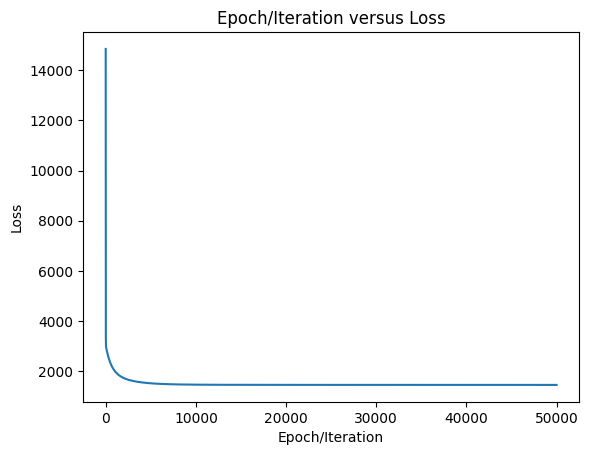

In [26]:
# Plot the loss curve
plt.plot(range(num_epochs), loss_history)
plt.xlabel("Epoch/Iteration")
plt.ylabel("Loss")
plt.title("Epoch/Iteration versus Loss")
plt.show()

### 4. Make predictions with custom vectorized linear regression

R-squared is very low. This is expected because Linear Regression is not a good model for diabetes dataset

In [27]:
y_train_pred_custom = np.dot(X_train, w)
y_test_pred_custom = np.dot(X_test, w)

In [28]:
# Other Linear Regression Metrics
print(f'Mean absolute error is:{mean_absolute_error(y_test, y_test_pred_custom): .2f}')
print(f'Root mean squared error is:{np.sqrt(mean_squared_error(y_test, y_test_pred_custom)): .2f}')

Mean absolute error is: 42.90
Root mean squared error is: 53.71


In [29]:
r2_score(y_train, y_train_pred_custom)

0.5237372354393944

In [30]:
r2_score(y_test, y_test_pred_custom)

0.455421687969106

##### Plots

The following plots are made
1. Actual V/s Predicted - Plotting actual data against the fitted line - shows if there is clear tendency for points to be distributed around the line - in our case no.
2. KDE of actual and predicted - This shows whether probability density of predicted values ​​does approximates real values (or not) - In our case it does not
3. Residual versus predicted - This plot tells if the residuals are randomly distributed uniformly around the fitted line - in our case it is indeed the case, but the error is too high


In [31]:
def plot_actual_vs_predicted(y, y_pred, title, x_label, y_label):
    #figure size
    plt.figure(figsize=(10, 7))
    
    #scatterplot of y y_pred
    plt.scatter(y, y_pred)
    plt.plot(y_test, y_test, color='r')

    #labeling
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    #showig plot
    plt.show()

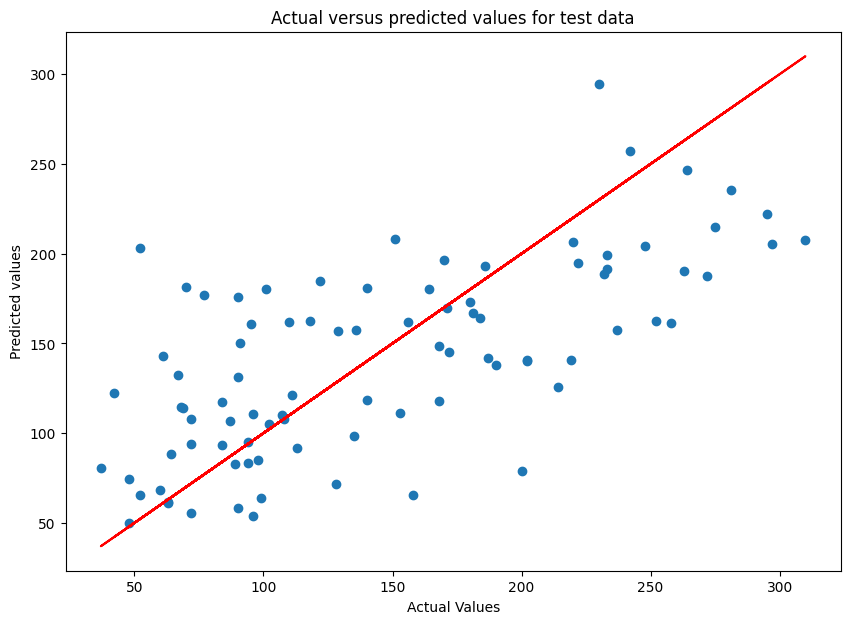

In [32]:
plot_actual_vs_predicted(y_test, y_test_pred_custom, 
                         'Actual versus predicted values for test data',
                         'Actual Values', 'Predicted values')

In [33]:
def plot_kde_actual_vs_predicted(y, y_pred, title, actual_label, predicted_label):
    ''' 
    The plot(kde) function plots the KDE. Inputs are just real and predicted y values, in this order:
    y, y_pred
    '''
    #figsize
    plt.figure(figsize=(10, 7))

    #Kernel Density Estimation plot
    ax = sns.kdeplot(y, color='r', label=actual_label) #actual values
    sns.kdeplot(y_pred, color='b', label=predicted_label, ax=ax) #predicted values

    #showing title
    plt.title(title)
    #showing legend
    plt.legend()
    #showing plot
    plt.show()

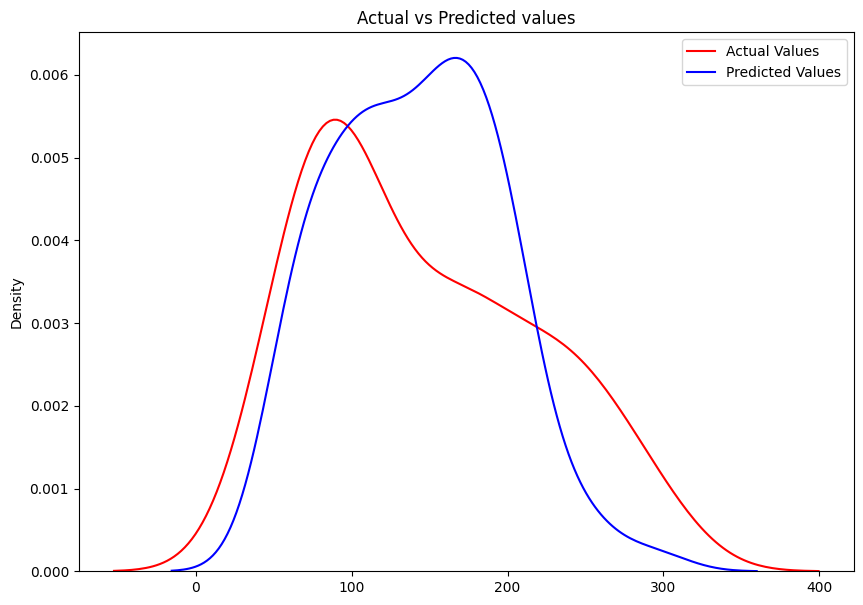

In [34]:
plot_kde_actual_vs_predicted(y_test, y_test_pred_custom, 
                             'Actual vs Predicted values', 'Actual Values', 'Predicted Values')

In [35]:
def plot_residual_vs_predicted(y, y_pred, title, x_label, y_label):
    #figure size
    plt.figure(figsize=(10, 7))

    #residual plot
    sns.residplot(x=y, y=y_pred)

    #labeling
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

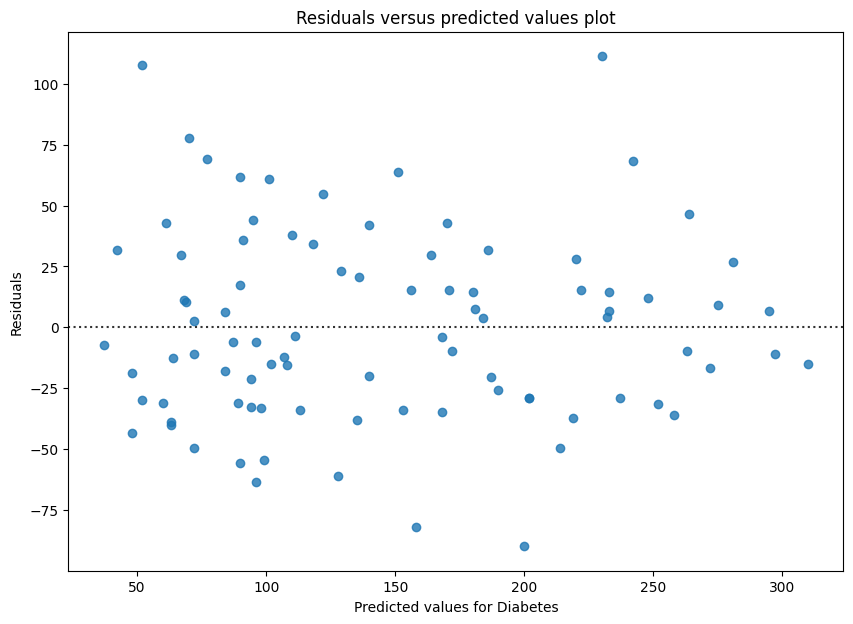

In [36]:
plot_residual_vs_predicted(y_test, y_test_pred_custom, 
                         'Residuals versus predicted values plot',
                         'Predicted values for Diabetes', 'Residuals')

Conclusion from plots:

1. Actual V/s Predicted Plot: Plotting actual data against the fitted line shows if there is NO clear tendency for points to be distributed around the line.
2. KDE of actual and predicted - Probability density of predicted values ​​does NOT approximate real values
3. Residual versus predicted: Residuals are indeed randomly distributed uniformly around the fitted line, but the error is too high. This confirms that linear regression is not a good model for this ML problem, and another one must be sought. A regularized version of Linear Regression will also not work because as we have seen, the R2 with training data is also very bad

We will next try out sklearn based
1. Linear Regression, followed by 
2. Ridge and Lasso Regression to demo 
    * Regularization by using GridSearchCV for tuning lambda hyperparameter and also 
    * To prove the point above wrt regularised Regression that it will not work
3. Finally a Polynomial Regression is also tried for completion

### 5. Use sklearn Linear Regression

In [37]:
data = load_diabetes()

In [38]:
X = data.data
y = data.target

# Convert the iris dataset to a pandas dataframe
df = pd.DataFrame(data.data, columns=["age","sex","bmi","bp", "tc", "ldl", "hdl","tch", "ltg", "glu"])

# Add the target variable to the dataframe
df['target'] = data.target

# Print the first 5 rows of the dataframe
df.head()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

R-squared is very low. This shows that very less of variance is explained by linear model and there is non linear component to it. 

In [41]:
y_train_pred_sklearn = model.predict(X_train)
y_test_pred_sklearn = model.predict(X_test)

In [42]:
# Other Linear Regression Metrics
print(f'Mean absolute error is:{mean_absolute_error(y_test, y_test_pred_custom): .2f}')
print(f'Root mean squared error is:{np.sqrt(mean_squared_error(y_test, y_test_pred_custom)): .2f}')

Mean absolute error is: 42.90
Root mean squared error is: 53.71


In [43]:
r2_score(y_train, y_train_pred_sklearn)

0.5279193863361498

In [44]:
r2_score(y_test, y_test_pred_sklearn)

0.4526027629719197

### 6. Lasso (L1) regularized Linear Regression

$$
\arg \min_w \nabla_w \mathcal{J} + \lambda_1 \nabla_w \|w\|_1 \\
\nabla_w \mathcal{J} = \frac{2}{m} X^T (Xw - y) \\
\nabla_w \|w\|_1 = \mathbf{1} \\
\textbf{w} = (\textbf{w} -\eta \lambda) - \eta \nabla_w \mathcal{J} 
$$

In [45]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

In [46]:
#defining the lasso model
model = Lasso()

#define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# efine grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)

#define search - here using a mean absolute error instead of mean squared error
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

#performing the search on the train dataset
results = search.fit(X_train, y_train)

#printing
print(f'MAE:{results.best_score_: .2f}')
print(f'Best Alpha:{results.best_params_}')

MAE:-44.86
Best Alpha:{'alpha': 0.01}


In [47]:
from scipy.stats import loguniform
from sklearn.model_selection import RandomizedSearchCV

In [48]:
# define model
model = Lasso()

# define evaluation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# define search space
space = dict()
space['alpha'] = loguniform(1e-5, 100)
space['fit_intercept'] = [True, False]

#define search
search = RandomizedSearchCV(model, space, n_iter=500, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, random_state=1)

# execute search
result = search.fit(X, y)

#printing
print(f'MAE:{results.best_score_: .2f}')
print(f'Best Alpha:{results.best_params_}')

MAE:-44.86
Best Alpha:{'alpha': 0.01}


In [49]:
#lasso with best alpha
model_best = Lasso(alpha=0.01).fit(X_train, y_train)

#predictions
y_train_pred = model_best.predict(X_train)
y_test_pred = model_best.predict(X_test)

print(r2_score(y_train, y_train_pred))
print(r2_score(y_test, y_test_pred))

0.5265153773726006
0.45668611945806237


The above metrics and alpha shows that regularization did not result in better test predictions. Further confirming that Linear model is not the way to go here

Exercise:
1. Try applying RidgeRegression

### 7. Polynomial Regression

We will use polynomial regression in a pipeline and perform grid search

In [49]:
data = load_diabetes()

In [50]:
X = data.data
y = data.target

# Convert the iris dataset to a pandas dataframe
df = pd.DataFrame(data.data, columns=["age","sex","bmi","bp", "tc", "ldl", "hdl","tch", "ltg", "glu"])

# Add the target variable to the dataframe
df['target'] = data.target

# Print the first 5 rows of the dataframe
df.head()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree=2):
    return Pipeline([('poly', PolynomialFeatures(degree)),
                     ('reg', LinearRegression())])

In [53]:
model = PolynomialRegression(5)
model.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=5)),
                ('reg', LinearRegression())])

In [54]:
train_score = model.score(X_train, y_train)
print(f'R2 score (train): {train_score:.5f}')

test_score = model.score(X_test, y_test)
print(f'R2 score (test): {test_score:.5f}')

R2 score (train): 1.00000
R2 score (test): -25.99292


Observation from above result: Excellent R2 on train and really bad score on test indicates overfitting


##### 7.1 Visualizing polynomial fit efficacy

When the data set is not two-dimensional, it is not possible to plot the polynomials in order to find the best fit to the data. A plot that can help you find the optimal polynomial degree in this case is a validation curve. A validation curve is a graph that shows the training and validation scores for various values of a given parameter. It is similar to a grid search with a single parameter, but it also allows you to plot the results.


Text(0, 0.5, '$R^2$ score')

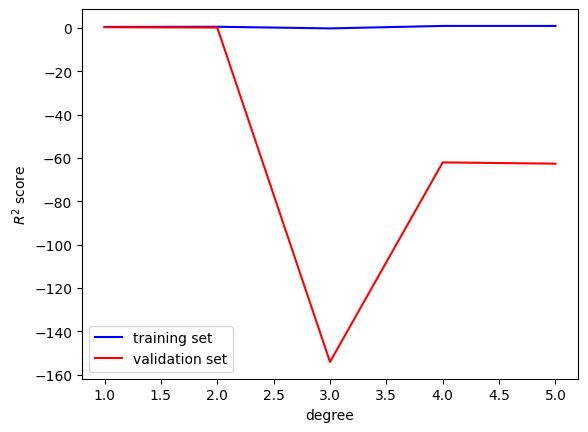

In [55]:
from sklearn.model_selection import validation_curve

degree = np.arange(1, 6)
train_scores, val_scores = validation_curve(
                                PolynomialRegression(), 
                                X_train, y_train, 
                                param_name='poly__degree', 
                                param_range=degree, 
                                cv=10
                           )
plt.plot(degree, np.mean(train_scores, axis=1), 'b', label='training set')
plt.plot(degree, np.mean(val_scores, axis=1), 'r', label='validation set')
plt.legend()
plt.xlabel('degree')
plt.ylabel('$R^2$ score')

In [56]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'poly__degree': np.arange(1, 6),
}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=10, n_jobs=-1)
grid.fit(X_train, y_train)

print(grid.best_params_)

{'poly__degree': 1}


Given that polynomial of degree 1 and 2 provide the same score, we stick to the simplest one - i.e. Linear Regression.

However it is interesting to see what Polynomial Features sklearn transformer does to the data X.
See next cell for reference

In [57]:
poly = PolynomialFeatures(3)
poly.fit_transform(X_train) # Puts 1 in first cell, x, x^2 and x^3 feature crosses in subsequent cells

array([[ 1.00000000e+00,  7.07687525e-02,  5.06801187e-02, ...,
        -8.06970387e-07,  3.17814796e-08, -1.25167226e-09],
       [ 1.00000000e+00, -9.14709343e-03,  5.06801187e-02, ...,
         1.45762706e-09,  1.05026237e-07,  7.56744351e-06],
       [ 1.00000000e+00,  5.38306037e-03, -4.46416365e-02, ...,
        -3.91924052e-06,  3.10667257e-06, -2.46257263e-06],
       ...,
       [ 1.00000000e+00,  3.08108295e-02, -4.46416365e-02, ...,
        -1.28117622e-07, -1.26633831e-08, -1.25167226e-09],
       [ 1.00000000e+00, -1.27796319e-02, -4.46416365e-02, ...,
        -5.67352478e-05, -5.65832186e-05, -5.64315968e-05],
       [ 1.00000000e+00, -9.26954778e-02, -4.46416365e-02, ...,
        -2.84966023e-08, -5.97230328e-09, -1.25167226e-09]])

##### 7.1 Alternative approaches to polynomial regression 

Polynomial regression is one example of regression models that use basis functions to model the relationship between two variables. In this type of models, the target variable y is modeled as a linear combination of a set of d basis functions of the input x:

$$
h(x) = w_0 + w_1 \varphi_1(x) + w_2 \varphi_2(x) + ......
$$

In polynomial regression, the basis functions are just the powers of x. Other popular families of basis functions include radial basis functions (RBF), splines, and wavelets. These families often provide a better fit to the data than polynomials

### 8. Applying normal equation directly for small datasets
$$
w = (X^TX)^{-1}X^Ty 
$$

In [58]:
data = load_diabetes()

In [59]:
X = data.data
y = data.target

# Convert the iris dataset to a pandas dataframe
df = pd.DataFrame(data.data, columns=["age","sex","bmi","bp", "tc", "ldl", "hdl","tch", "ltg", "glu"])

# Add the target variable to the dataframe
df['target'] = data.target

# Print the first 5 rows of the dataframe
df.head()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [60]:
X_withones = np.hstack((np.ones(X.shape[0]).reshape(-1,1), X))
X_train, X_test, y_train, y_test = train_test_split(X_withones, y, test_size=0.2, random_state=42)

In [61]:
# w = (X^TX)^-1 X^Ty
w = np.dot(
        np.dot(
            np.linalg.inv(np.dot(X_train.T, X_train)), 
            X_train.T), 
        y_train)
w

array([ 151.34560454,   37.90402135, -241.96436231,  542.42875852,
        347.70384391, -931.48884588,  518.06227698,  163.41998299,
        275.31790158,  736.1988589 ,   48.67065743])

In [62]:
y_test_pred = np.dot(X_test, w)

In [63]:
r2_score(y_true=y_test, y_pred=y_test_pred)

0.4526027629719188

### 9. OLS from Statsmodel package

https://medium.com/codex/step-by-step-guide-to-simple-and-multiple-linear-regression-in-python-867ac9a30298


For a detailed explanation of other regression metrics extensively used in R and commercial tools like SPSS etc, refer to this article to get a quick run down of F-statistic, p-value, Akaike Information Criterion  and Bayesian Information Criterion
https://medium.com/analytics-vidhya/multiple-linear-regression-an-intuitive-approach-f874f7a6a7f9

In [64]:
# https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles
df = pd.read_csv("data/co2_emissions.csv")
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [65]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [66]:
# For ease of use in our regression, we drop character columns
# In reality you might want to encode these in some appropriate way

df.drop(['Make','Model','Vehicle Class','Transmission','Fuel Type'], axis = 1, inplace = True)

In [67]:
from matplotlib import style

style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (20,10)

C:\Users\srikanth\AppData\Local\Temp\ipykernel_25168\121696119.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-whitegrid')


c:\Users\srikanth\anaconda3\envs\quickstart\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


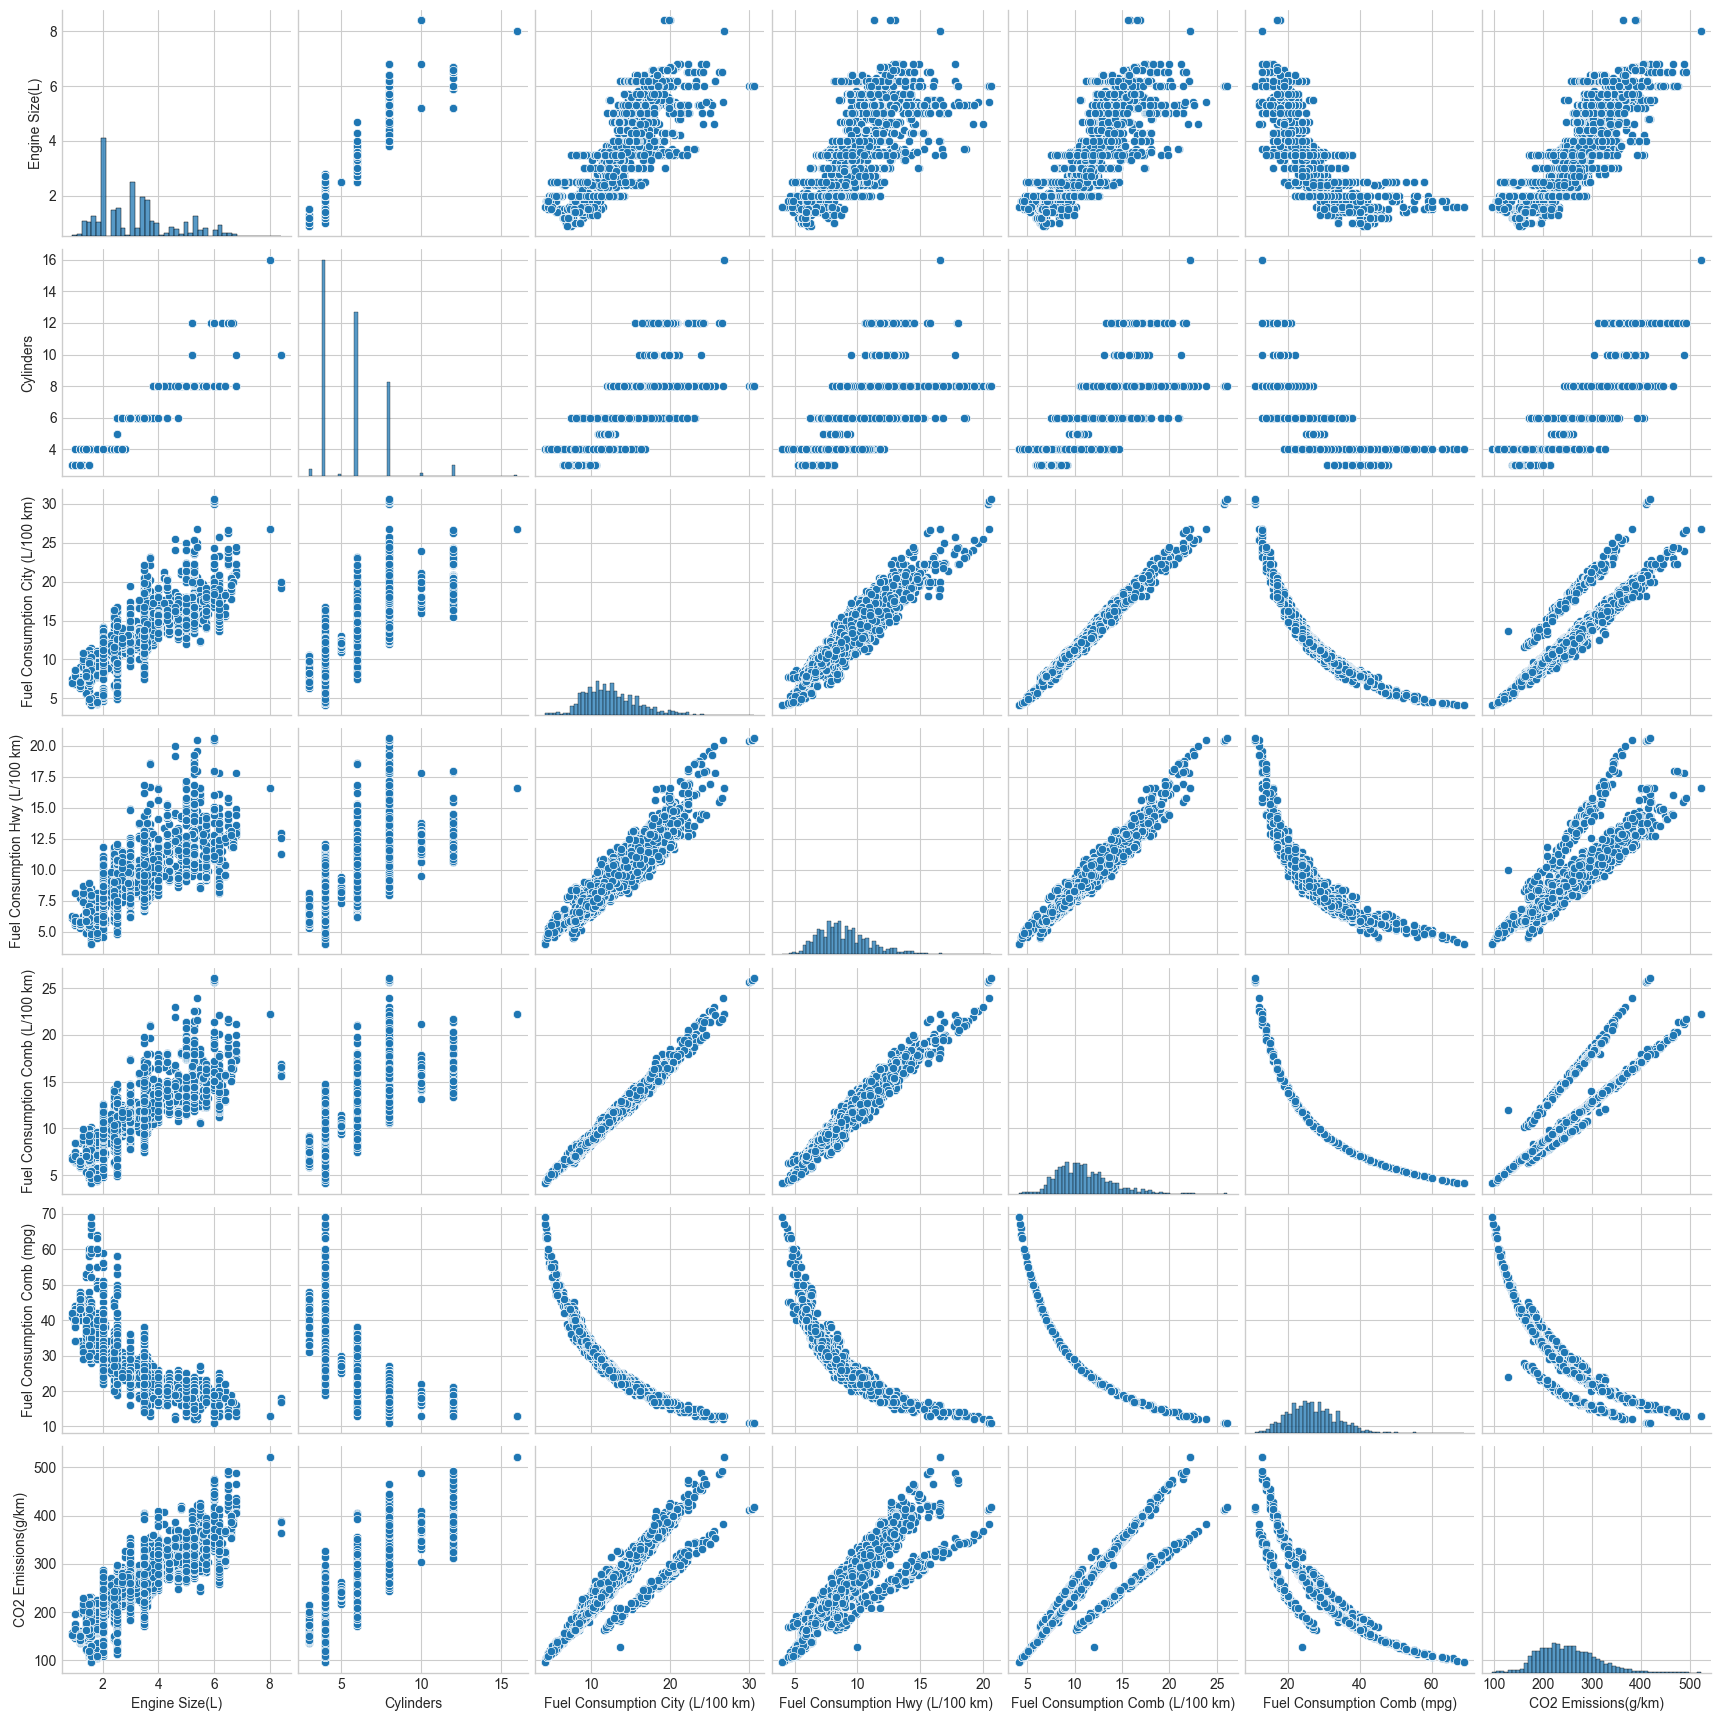

In [68]:
sns.pairplot(df)
#plt.savefig('pairplot.png')

Text(0.5, 0, 'Engine Size')

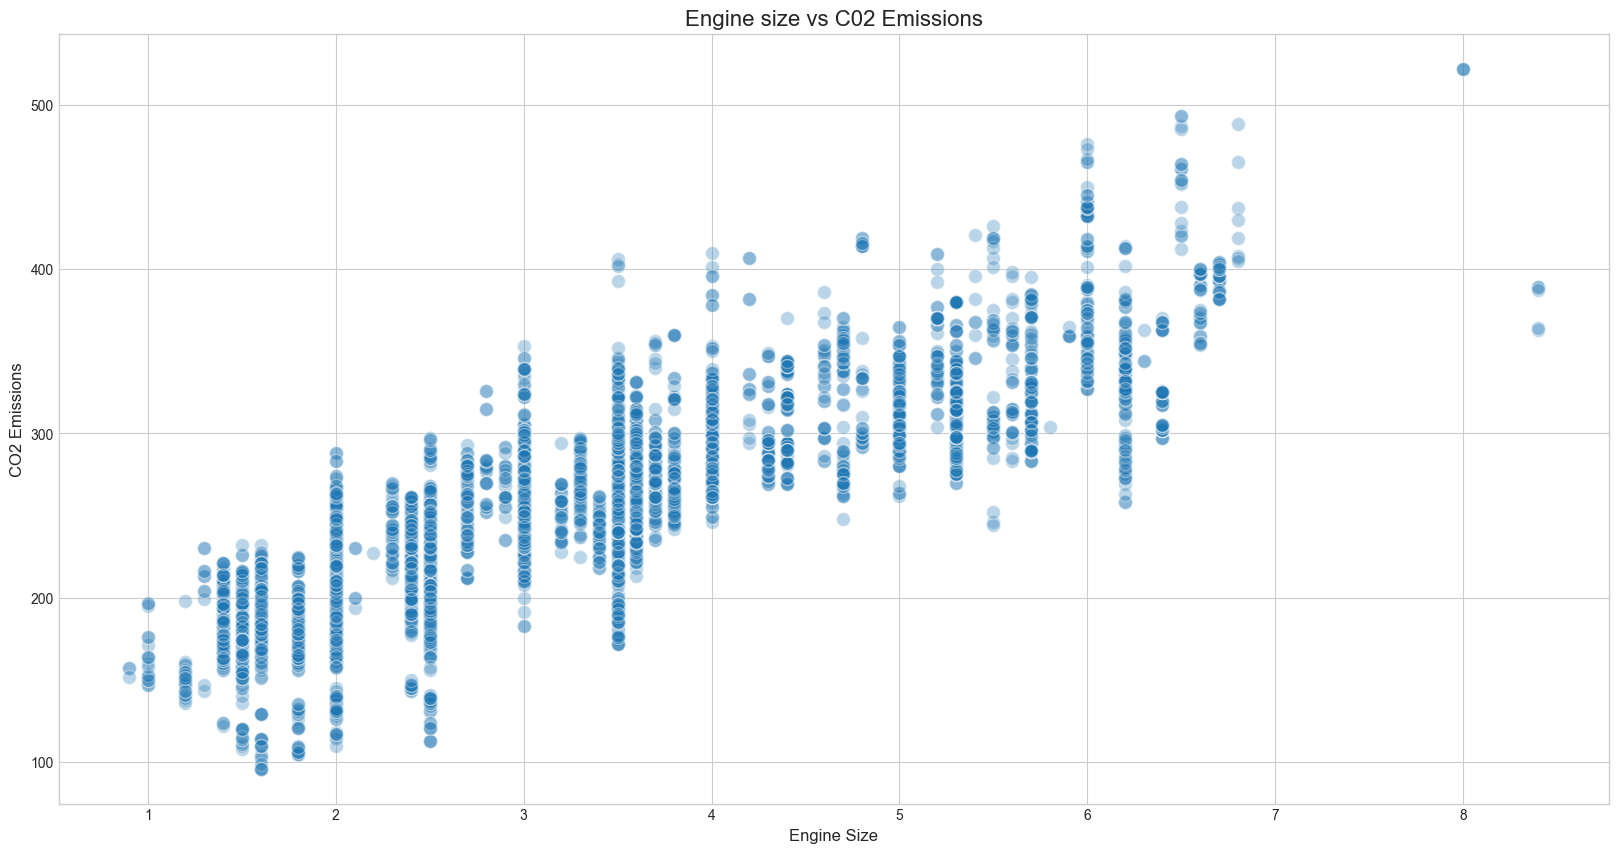

In [69]:
plt.scatter(x = 'Engine Size(L)', y = 'CO2 Emissions(g/km)', data = df, s = 100, alpha = 0.3, edgecolor = 'white')
plt.title('Engine size vs C02 Emissions', fontsize = 16)
plt.ylabel('CO2 Emissions', fontsize = 12)
plt.xlabel('Engine Size', fontsize = 12)

Text(0.5, 0, 'Fuel Consumption Comb (L/100 km)')

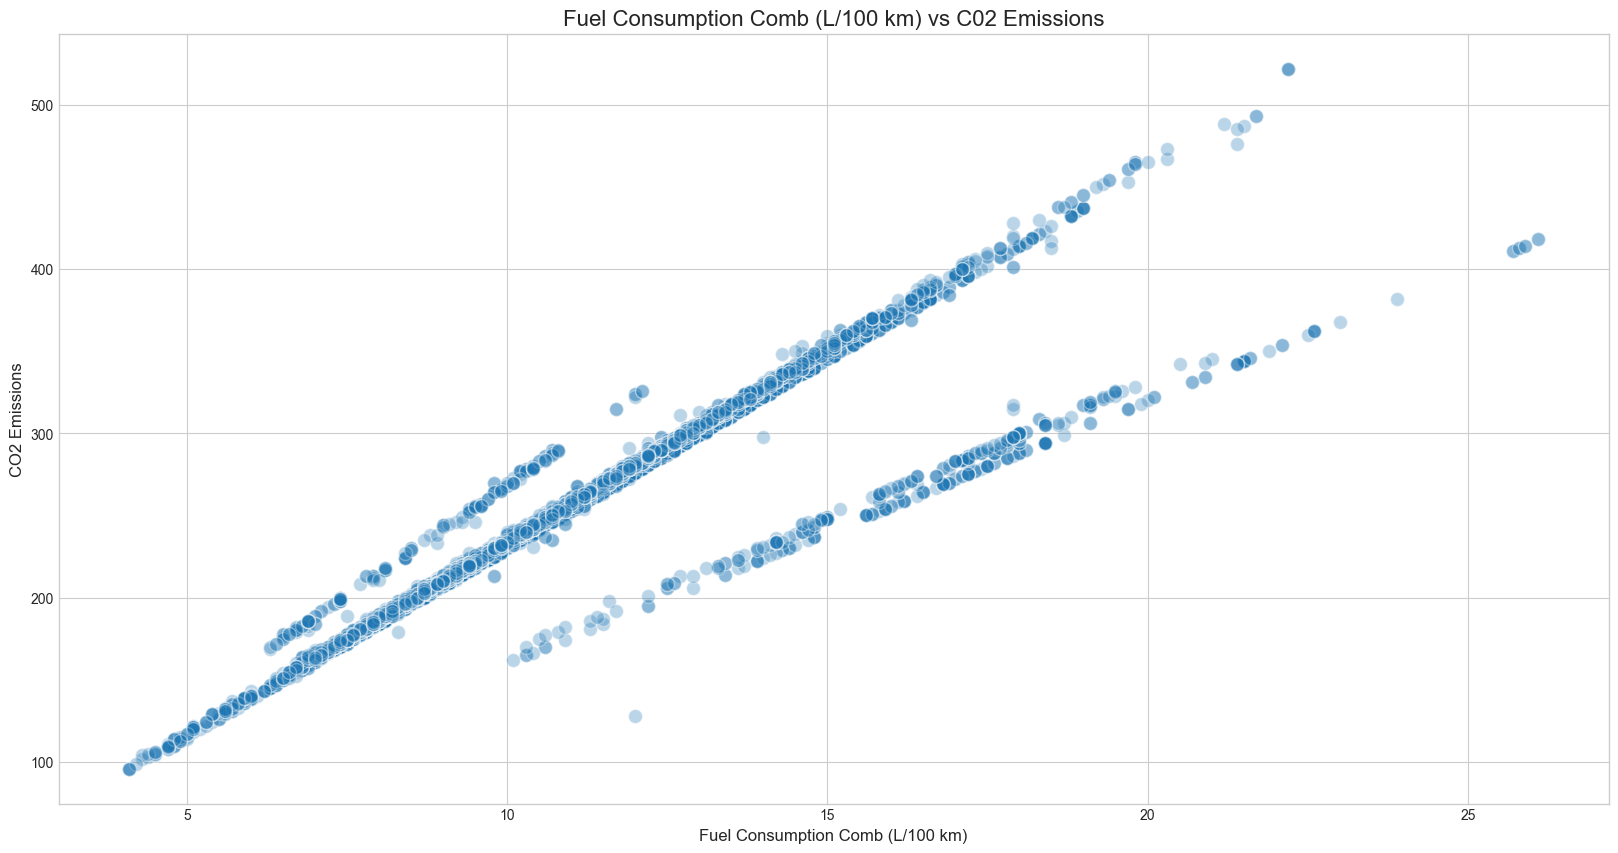

In [70]:
plt.scatter(x = 'Fuel Consumption Comb (L/100 km)', y = 'CO2 Emissions(g/km)', data = df, s = 100, alpha = 0.3, edgecolor = 'white')
plt.title('Fuel Consumption Comb (L/100 km) vs C02 Emissions', fontsize = 16)
plt.ylabel('CO2 Emissions', fontsize = 12)
plt.xlabel('Fuel Consumption Comb (L/100 km)', fontsize = 12)

<Axes: >

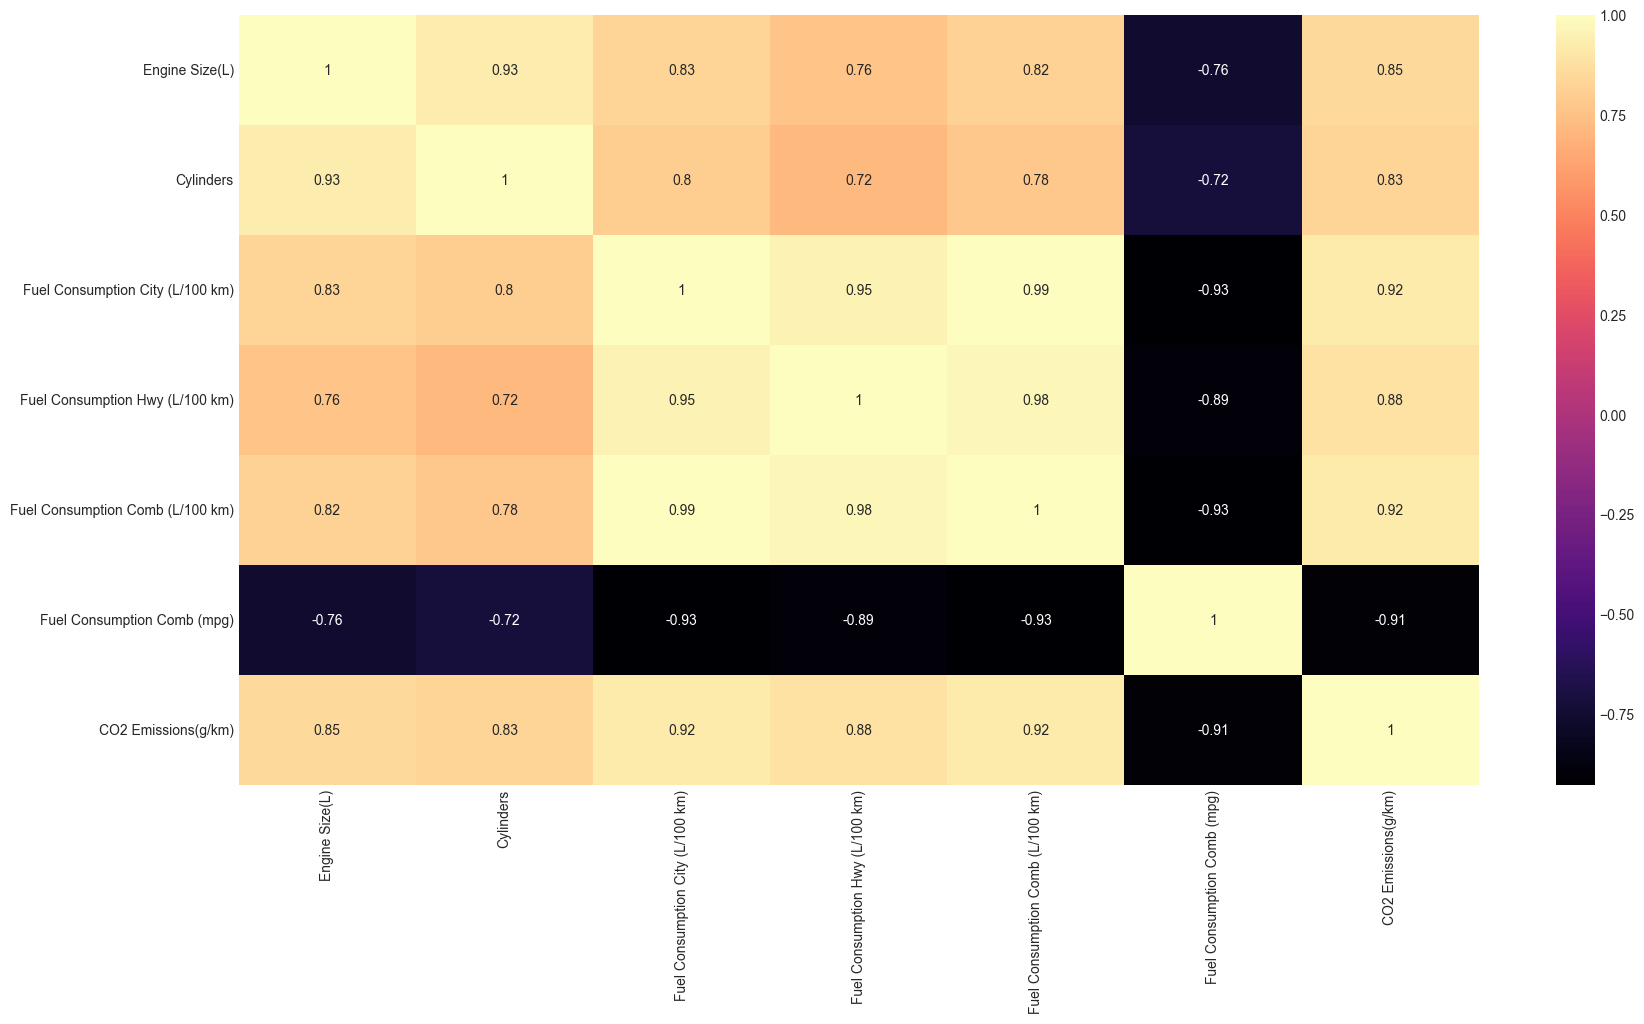

In [71]:
sns.heatmap(df.corr(), annot = True, cmap = 'magma')

Observation: 
1. Fuel consumption is highly negatively correlated with every other feature.
2. A lot of other columns are highly positively correlated 

##### 9.1 Simple Linear Regression 

With one feature

In [72]:
X_var = df[['Engine Size(L)']] # independent variable
y_var = df['CO2 Emissions(g/km)'] # dependent variable

1. !pip install statsmodels  - run this command in conda shell
2. !pip install termcolor

In [73]:
import statsmodels.api as sm

slr_model = sm.OLS(y_var, X_var) # Ordinary Least Squares 
slr_reg = slr_model.fit()

In [74]:
from termcolor import colored as cl

print(cl(slr_reg.summary(),attrs = ['bold']))

                                 OLS Regression Results                                 
Dep. Variable:     CO2 Emissions(g/km)   R-squared (uncentered):                   0.943
Model:                             OLS   Adj. R-squared (uncentered):              0.943
Method:                  Least Squares   F-statistic:                          1.232e+05
Date:                 Sat, 21 Oct 2023   Prob (F-statistic):                        0.00
Time:                         11:52:28   Log-Likelihood:                         -40860.
No. Observations:                 7385   AIC:                                  8.172e+04
Df Residuals:                     7384   BIC:                                  8.173e+04
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

##### Multiple Linear Regression with OLS

In [75]:
X1_var = df[['Engine Size(L)','Fuel Consumption Comb (L/100 km)',
             'Fuel Consumption Hwy (L/100 km)','Fuel Consumption City (L/100 km)']]
y_var = df['CO2 Emissions(g/km)'] # dependent variable


sm_X1_var = sm.add_constant(X1_var)
mlr_model = sm.OLS(y_var, sm_X1_var)
mlr_reg = mlr_model.fit()

In [76]:
print(cl(mlr_reg.summary(), attrs = ['bold']))

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.874
Model:                             OLS   Adj. R-squared:                  0.874
Method:                  Least Squares   F-statistic:                 1.276e+04
Date:                 Sat, 21 Oct 2023   Prob (F-statistic):               0.00
Time:                         11:52:28   Log-Likelihood:                -32890.
No. Observations:                 7385   AIC:                         6.579e+04
Df Residuals:                     7380   BIC:                         6.582e+04
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

Observation:
1. Not only Adjusted R-squared, but also R2 itself dropped when adding second feature

**Exercise**

Perform Linear Regression using the advertising dataset: https://www.kaggle.com/code/priyankasiveram/linear-regression-using-advertising-sales-dataset

### 10. Demoing usage of Lasso (L1) regression elimination of features

1. As alpha (lambda) increases, the number of features eliminated increases

Using the Energy efficiency data from https://archive.ics.uci.edu/dataset/242/energy+efficiency

**Important** !pip install openpyxl

In [83]:
df = pd.read_excel("data/ENB2012_data.xlsx")
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


1. X1 Relative Compactness
2. X2 Surface Area
3. X3 Wall Area
4. X4 Roof Area
5. X5 Overall Height
6. X6 Orientation
7. X7 Glazing Area
8. X8 Glazing Area Distribution
9. y1 Heating Load
10. y2 Cooling Load

In [84]:
y1 = df.pop("Y1")
y2 = df.pop("Y2")
X = df
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)

In [85]:
lasso_model = Lasso(alpha = 0.1)
lasso_model.fit(X=X_train, y=y_train)

Lasso(alpha=0.1)

In [86]:
#extract the coefficients
df_coef_lasso = pd.DataFrame({"var": X_train.columns.values, 
                              "coef":lasso_model.coef_})
df_coef_lasso

,var,coef
0,X1,-0.000000
1,X2,0.001834
2,X3,0.050003
3,X4,-0.000000
4,X5,4.818565
5,X6,-0.000000
6,X7,14.580084
7,X8,0.274363


In [87]:
lasso_model.score(X_train, y_train)

0.9068544351244907

In [88]:
model_predictions = lasso_model.predict(X_test)
lasso_model.score(X=X_test, y=y_test)

0.9032061783960788

c:\Users\srikanth\anaconda3\envs\quickstart\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3882.8051344771247, tolerance: 36.334639970000005
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\srikanth\anaconda3\envs\quickstart\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2714.052709692091, tolerance: 36.334639970000005
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\srikanth\anaconda3\envs\quickstart\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2661.3574365729028, tolerance: 36.334639970000005
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\srikanth\anaconda3\envs

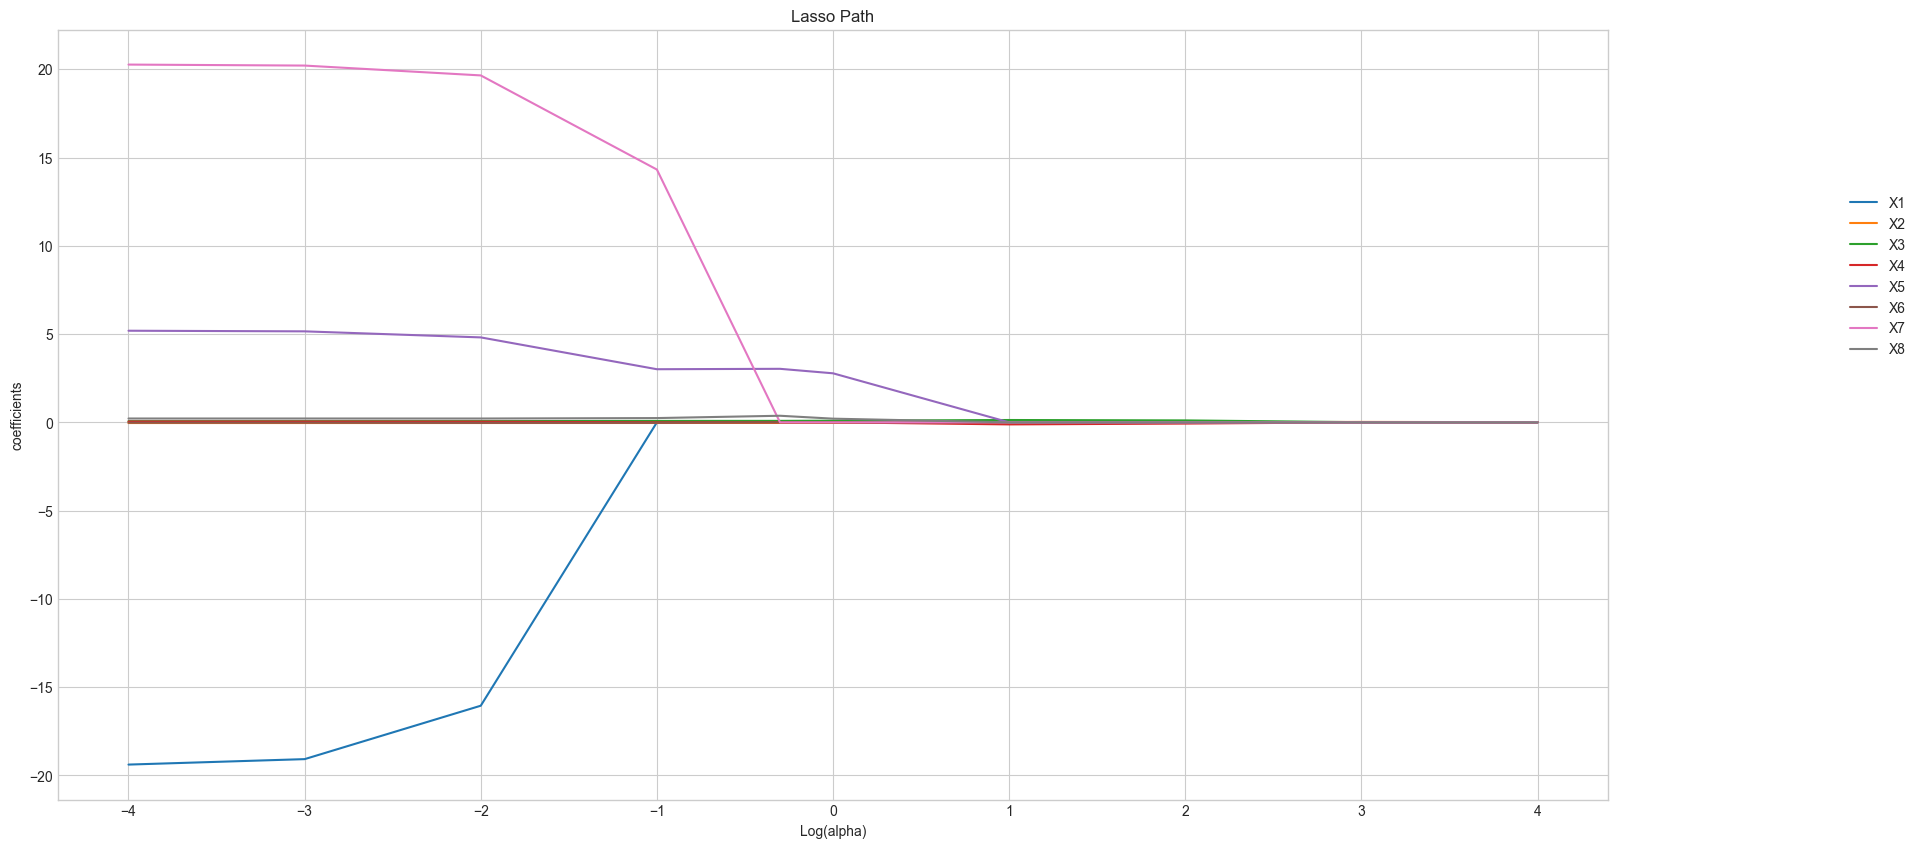

In [90]:
#import the necessary modules
from itertools import cycle
from sklearn.linear_model import lasso_path
import numpy as np
import matplotlib.pyplot as plt
#run the lasso path
alphas_lasso, coefs_lasso, _ = lasso_path(X_train, y_train.values.reshape(-1),
                                          alphas = [.0001, .001, .01,.1, .5, 1, 10, 100, 1000, 10000])
#plot the coefficients over the path
log_alphas_lasso = np.log10(alphas_lasso)
for index, coef_l in enumerate(coefs_lasso):
    l1 = plt.plot(log_alphas_lasso, coef_l,
                 label = X_train.columns.values[index])
#add labels
plt.xlabel('Log(alpha)')
plt.ylabel('coefficients')
plt.title('Lasso Path')
plt.axis('tight')
plt.legend(bbox_to_anchor = (0.7, 0.3, 0.5, 0.5))
#sho the model
plt.show()

**Observation**: The above plot shows how each feature becomes irrelevant as alpha increases

### 11. Heteroskedasticity

1. https://www.kaggle.com/datasets/alexeyleshchenko/moscow-apartment-listings/
2. https://www.analyticsvidhya.com/blog/2022/09/identifying-and-dealing-with-multicollinearity-and-heteroscedasticity/


In [117]:
df = pd.read_csv("data/moscow_apartment_listings.csv")
df.head()

,price,repair,year_built_empty,house_age,closest_subway,dist_to_subway,sg,lat,lon,subway_dist_to_center,...,subway_offers,address_offers,rooms,footage,floor,max_floor,first_floor,last_floor,AO,hm
0,8000000,3,0,42,59,960,0.0,55.609009,37.734632,17166,...,5,1.0,1,39.4,11,12,0,0,UAO,panel
1,7200000,2,0,43,59,802,0.0,55.608760,37.741936,17166,...,9,1.0,1,35.6,2,9,0,0,UAO,panel
2,10300000,2,0,43,59,638,0.0,55.610207,37.742495,17166,...,9,2.0,2,53.0,5,12,0,0,UAO,panel
3,8500000,2,0,43,59,929,0.0,55.624017,37.740373,17166,...,5,1.0,2,44.1,8,9,0,0,UAO,panel
4,9000000,2,0,43,59,785,0.0,55.609107,37.740430,17166,...,5,1.0,2,44.2,6,9,0,0,UAO,panel


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12181 entries, 0 to 12180
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  12181 non-null  int64  
 1   repair                 12181 non-null  int64  
 2   year_built_empty       12181 non-null  int64  
 3   house_age              12181 non-null  int64  
 4   closest_subway         12181 non-null  int64  
 5   dist_to_subway         12181 non-null  int64  
 6   sg                     12181 non-null  float64
 7   lat                    12181 non-null  float64
 8   lon                    12181 non-null  float64
 9   subway_dist_to_center  12181 non-null  int64  
 10  h3                     12181 non-null  object 
 11  agent_offers           12181 non-null  int64  
 12  subway_offers          12181 non-null  int64  
 13  address_offers         12181 non-null  float64
 14  rooms                  12181 non-null  int64  
 15  fo

Dropping categorical variables before OLS. To use categorical variables in OLS, refer to this - https://www.datarobot.com/blog/multiple-regression-using-statsmodels/. Alternatively you will also learn this in AAPS subject in second semester

In [119]:
char_cols = df.select_dtypes(include=["object"]).columns.tolist()
print(char_cols)
df.drop(char_cols, axis=1, inplace=True)
df.head()

['h3', 'AO', 'hm']


,price,repair,year_built_empty,house_age,closest_subway,dist_to_subway,sg,lat,lon,subway_dist_to_center,agent_offers,subway_offers,address_offers,rooms,footage,floor,max_floor,first_floor,last_floor
0,8000000,3,0,42,59,960,0.0,55.609009,37.734632,17166,1,5,1.0,1,39.4,11,12,0,0
1,7200000,2,0,43,59,802,0.0,55.608760,37.741936,17166,1,9,1.0,1,35.6,2,9,0,0
2,10300000,2,0,43,59,638,0.0,55.610207,37.742495,17166,57,9,2.0,2,53.0,5,12,0,0
3,8500000,2,0,43,59,929,0.0,55.624017,37.740373,17166,292,5,1.0,2,44.1,8,9,0,0
4,9000000,2,0,43,59,785,0.0,55.609107,37.740430,17166,292,5,1.0,2,44.2,6,9,0,0


In [113]:
#y = df.pop("price")
#X = df #.to_numpy()
#X = sm.add_constant(X)
#model = sm.OLS(y,X)
#model = model.fit()


In [114]:
import statsmodels.formula.api as smf 
# formula: response ~ predictor + predictor 
est = smf.ols(formula='price ~ repair + year_built_empty + house_age + dist_to_subway', data=df).fit()

**Detecting Heteroscedasticity**
Among several dozen methods to detect Heteroskedasticity, here we use Het-White Test. The methodology is as follows:
1. First, we make two hypotheses: Null (H0) and Alternate (H1).
    * H0: The dataset has homoskedasticity.
    * H1: The dataset does not have homoskedasticity but Heteroscedasticity.
2. The test returns values for ‘Lagrange Multiplier statistic’, ‘LM test’s p-value’, ‘F-statistic’, and ‘F-test’s p-value’. 
3. If the P-value output is less than 0.05. Then we reject the null hypothesis

In [121]:
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
from patsy import dmatrices

expr = 'price ~ repair + year_built_empty + house_age + dist_to_subway'
y, X = dmatrices(expr, df, return_type='dataframe')

keys = ['Lagrange Multiplier statistic:', 'LM test\'s p-value:', 'F-statistic:', 'F-test\'s p-value:']
results = het_white(model.resid, X)
lzip(keys, results)

[('Lagrange Multiplier statistic:', 588.6230324115745),
 ("LM test's p-value:", 2.8471041766982624e-118),
 ('F-statistic:', 51.48760746257054),
 ("F-test's p-value:", 2.5182800483747947e-121)]

### Multicollinearity

1. https://www.analyticsvidhya.com/blog/2022/09/identifying-and-dealing-with-multicollinearity-and-heteroscedasticity/
2. https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/
3. https://www.kaggle.com/code/kartikeyat/model-performance-w-o-multicollinearity-vif/notebook (This notebook deals VIF for cat cols also. How?)
4. https://www.kaggle.com/code/dyasin/week24ml-weather-dataset-rattle-package-weatheraus

In [147]:
df = pd.read_csv("data/weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [148]:
import statsmodels.api as sm              ## Performing statistical methods
from statsmodels.stats.outliers_influence import variance_inflation_factor    ## For checking Multicollinearity

Before calculating VIF, we need to remove columns with NA or impute

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

<Axes: >

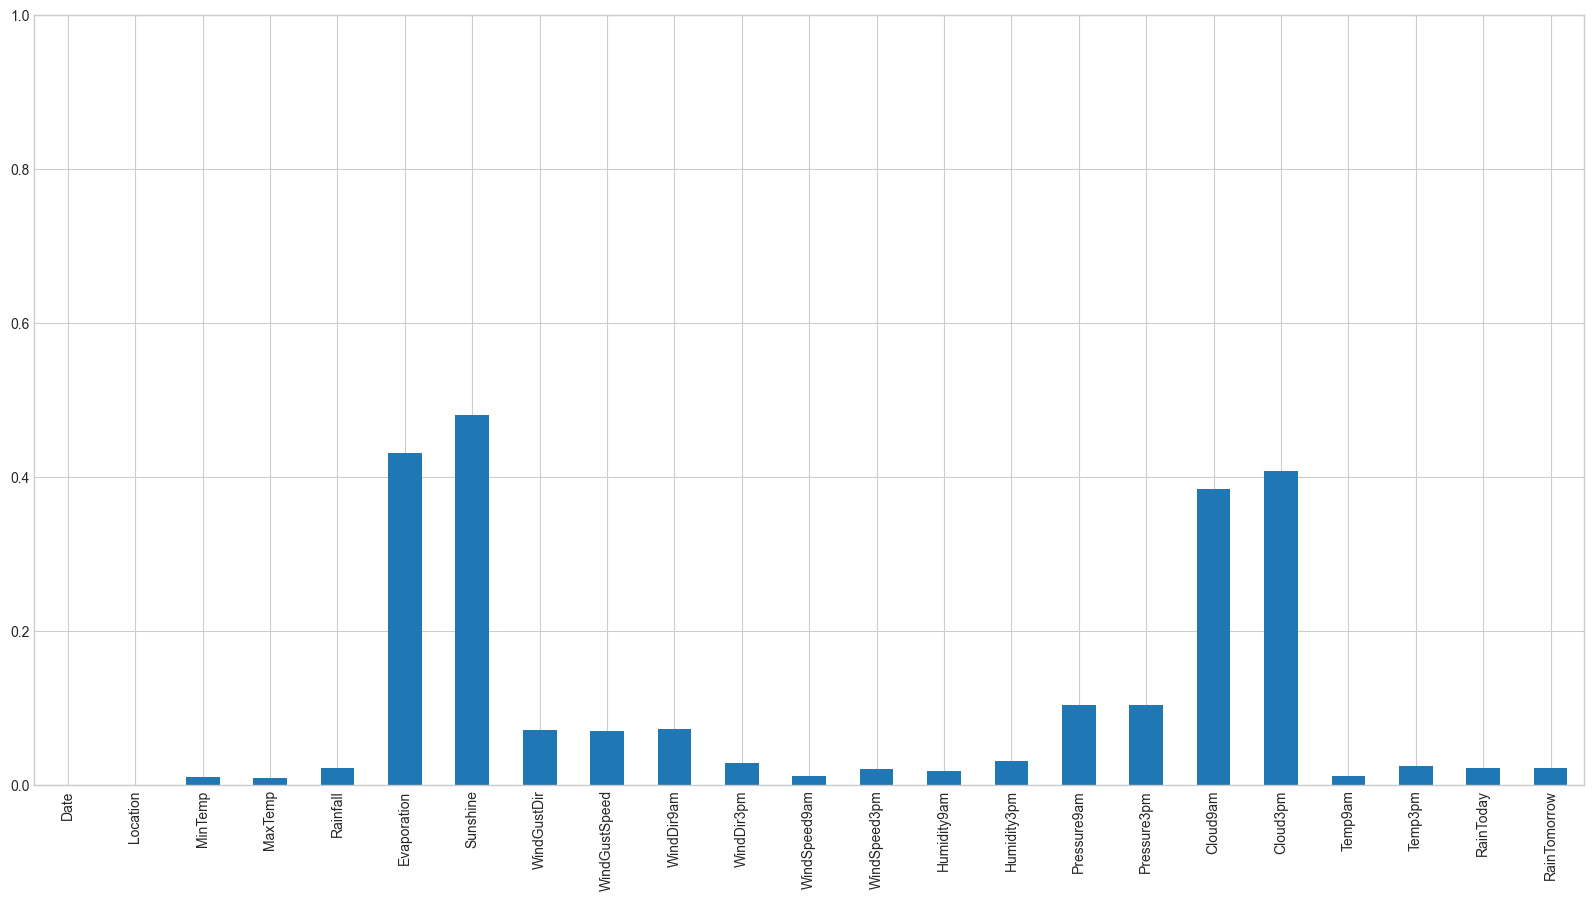

In [150]:
# Missing percentage
(df.isna().sum(axis=0)/df.shape[0]).plot(kind = 'bar',ylim = (0,1))

In [151]:
# Drop columns with more than 20% missing values
missing_percent = df.isna().sum(axis=0)/df.shape[0]
drop_cols = missing_percent[missing_percent > 0.2].index
df.drop(columns=drop_cols,inplace=True)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [152]:
df.drop(columns = 'Date' , inplace=True)

<Axes: >

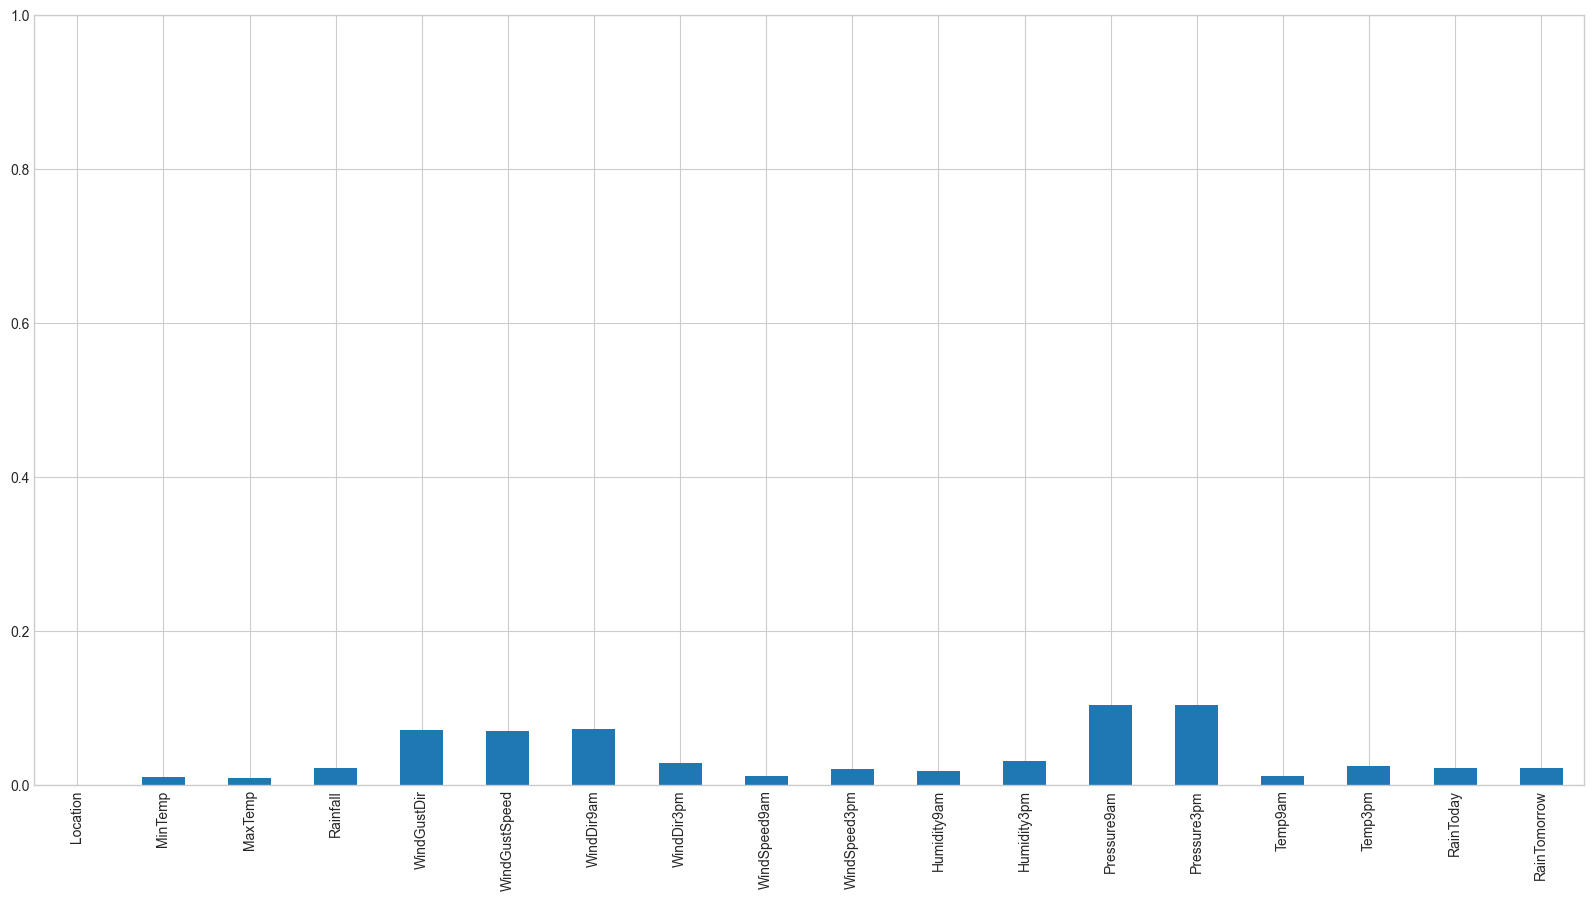

In [153]:
missing_percent = df.isna().sum(axis=0)/df.shape[0]
missing_percent.plot(kind='bar',ylim=(0,1))

In [154]:
df.dropna(axis=0,inplace=True)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112925 entries, 0 to 145458
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       112925 non-null  object 
 1   MinTemp        112925 non-null  float64
 2   MaxTemp        112925 non-null  float64
 3   Rainfall       112925 non-null  float64
 4   WindGustDir    112925 non-null  object 
 5   WindGustSpeed  112925 non-null  float64
 6   WindDir9am     112925 non-null  object 
 7   WindDir3pm     112925 non-null  object 
 8   WindSpeed9am   112925 non-null  float64
 9   WindSpeed3pm   112925 non-null  float64
 10  Humidity9am    112925 non-null  float64
 11  Humidity3pm    112925 non-null  float64
 12  Pressure9am    112925 non-null  float64
 13  Pressure3pm    112925 non-null  float64
 14  Temp9am        112925 non-null  float64
 15  Temp3pm        112925 non-null  float64
 16  RainToday      112925 non-null  object 
 17  RainTomorrow   112925 non-nul

Deal with categorical columns

In [156]:
df['RainTomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)
df['RainToday'].replace({'No':0, 'Yes': 1}, inplace = True)

In [157]:
numeric_cols = list(df.select_dtypes(exclude='object'))
categorical_cols = ['Location']
ordinal_cols = list(set(df.columns) - set(numeric_cols) - set(categorical_cols))
numeric_cols.remove('RainTomorrow')

In [159]:
numeric_cols = list(df.select_dtypes(exclude='object'))
categorical_cols = ['Location']
ordinal_cols = list(set(df.columns) - set(numeric_cols) - set(categorical_cols))
numeric_cols.remove('RainTomorrow')

In [160]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
for feature in categorical_cols+ordinal_cols:
    label_encoder = LabelEncoder()
    df[feature] = label_encoder.fit_transform(df[feature])

In [161]:
from scipy.stats import chi2_contingency
print("Relation with RainTomorrow at p = 0.05 ")
for feature in categorical_cols+ordinal_cols:
    data = pd.crosstab(df[feature],df['RainTomorrow'])
    stat, p , dof , expected = chi2_contingency(data)
    if p <= 0.05:
        print('{0} : Related ' .format(feature))
    else:
        print('{0} : Not Related' .format(feature))

Relation with RainTomorrow at p = 0.05 
Location : Related 
WindDir9am : Related 
WindGustDir : Related 
WindDir3pm : Related 


<Axes: >

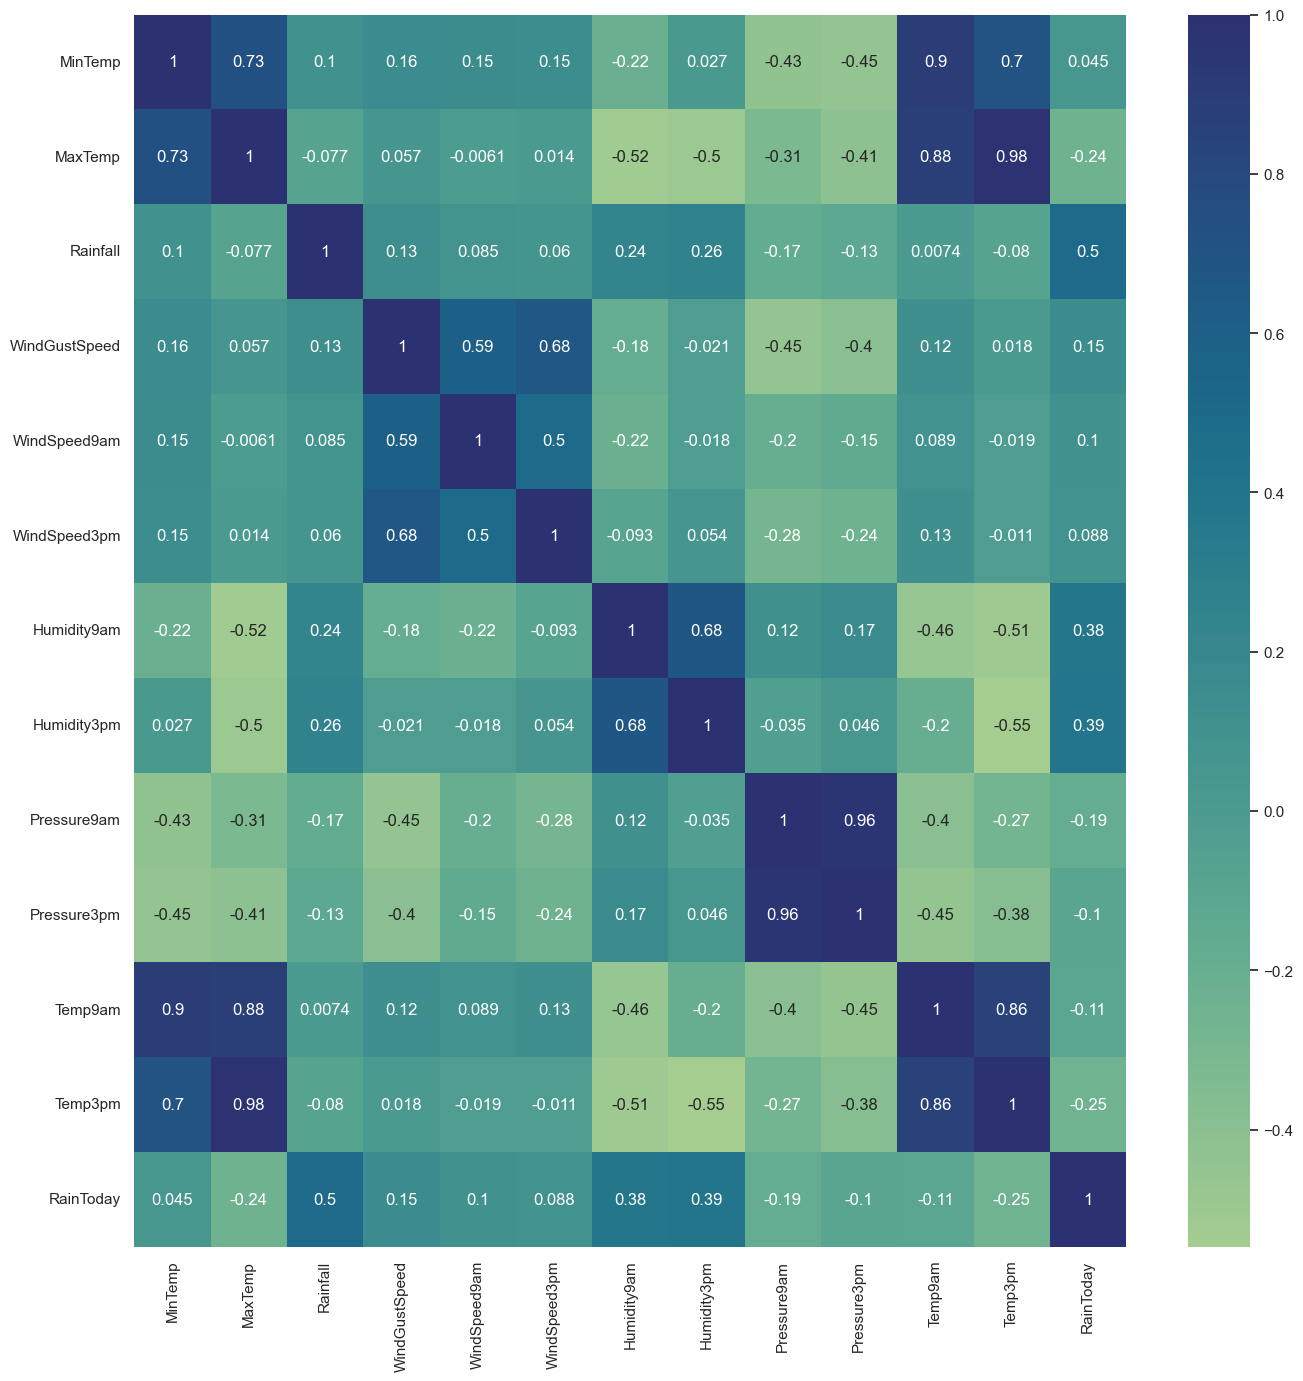

In [162]:
sns.set(rc = {'figure.figsize' : (16,16)})
sns.heatmap(df[numeric_cols].corr(), annot = True , 
            cmap=sns.color_palette("crest", as_cmap=True)
)

**Calculate VIF**

In [166]:
vif_data = pd.DataFrame()
ind_features = df[numeric_cols]
vif_data['feature'] = ind_features.columns

In [167]:
vif_data['VIF'] = [variance_inflation_factor(ind_features.values, i)
                       for i in range(len(ind_features.columns))]

In [168]:
vif_data.sort_values(by='VIF',ascending=False)

,feature,VIF
8,Pressure9am,385561.906489
9,Pressure3pm,382802.505963
11,Temp3pm,600.236749
1,MaxTemp,539.758504
10,Temp9am,184.913337
6,Humidity9am,57.266488
7,Humidity3pm,44.289510
0,MinTemp,43.694327
3,WindGustSpeed,24.836103
5,WindSpeed3pm,12.553571


**Observations**

1. A lots of very high VIFs...
2. But not all of these features need to be deleted
3. We can cleverly creagte some new features out of these as shown below


In [169]:
# Make copy of current dataframe before changes
df_before_vif_fix = df.copy(deep = True)

In [170]:
df['Pressure_Interval'] = abs(df['Pressure9am'] - df['Pressure3pm'])
df['Humidity_Interval'] = abs(df['Humidity9am'] - df['Humidity3pm'])
df['TempInterval'] = abs(df['Temp9am'] - df['Temp3pm'])
df['WindSpeedInterval'] = abs(df['WindSpeed9am'] - df['WindSpeed3pm'])
df['Temperature_Interval'] = abs(df['MaxTemp'] - df['MinTemp'])
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Pressure_Interval,Humidity_Interval,TempInterval,WindSpeedInterval,Temperature_Interval
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,...,1007.1,16.9,21.8,0,0,0.6,49.0,4.9,4.0,9.5
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,...,1007.8,17.2,24.3,0,0,2.8,19.0,7.1,18.0,17.7
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,...,1008.7,21.0,23.2,0,0,1.1,8.0,2.2,7.0,12.8
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,...,1012.8,18.1,26.5,0,0,4.8,29.0,8.4,2.0,18.8
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,...,1006.0,17.8,29.7,0,0,4.8,49.0,11.9,13.0,14.8


In [171]:
#Drop the columns that contributed to the difference calc above
df.drop(columns=['Pressure9am','Pressure3pm','MaxTemp','MinTemp','WindDir9am','WindDir3pm',
                 'Humidity9am','Humidity3pm','Temp9am','Temp3pm','WindSpeed9am','WindSpeed3pm'],
                 axis=1,inplace=True)

In [173]:
ind_features = df.drop('RainTomorrow',axis=1)

In [174]:
ind_features.columns

Index(['Location', 'Rainfall', 'WindGustDir', 'WindGustSpeed', 'RainToday',
       'Pressure_Interval', 'Humidity_Interval', 'TempInterval',
       'WindSpeedInterval', 'Temperature_Interval'],
      dtype='object')

In [177]:
numeric_cols = list(df.select_dtypes(exclude='object'))
vif_data = pd.DataFrame()
ind_features = df[numeric_cols]
vif_data['feature'] = ind_features.columns

In [178]:
vif_data["VIF"] = [variance_inflation_factor(ind_features.values, i)
                          for i in range(len(ind_features.columns))]

In [179]:
vif_data.sort_values(by='VIF',ascending=False)

,feature,VIF
8,Temperature_Interval,15.372680
6,TempInterval,13.476936
1,WindGustSpeed,7.328299
5,Humidity_Interval,5.786142
4,Pressure_Interval,4.831896
7,WindSpeedInterval,2.882021
2,RainToday,1.939871
3,RainTomorrow,1.609107
0,Rainfall,1.449751


Drop features with VIF > 0 and apply linear regression

In [181]:
df.drop(list(vif_data[vif_data['VIF']>5]['feature']),axis=1,inplace=True)

In [182]:
df.head()

,Location,Rainfall,WindGustDir,RainToday,RainTomorrow,Pressure_Interval,WindSpeedInterval
0,Albury,0.6,W,0,0,0.6,4.0
1,Albury,0.0,WNW,0,0,2.8,18.0
2,Albury,0.0,WSW,0,0,1.1,7.0
3,Albury,0.0,NE,0,0,4.8,2.0
4,Albury,1.0,W,0,0,4.8,13.0
